# Homework 12

Finish the development of your code to construct persistence diagrams.

Use your code to examine some data and find persistent homologies, and do some simple analysis.

Your code must do all the following:

1. Read in the data.  CSV files (M_data<indexnumber>.csv) have been uploaded to the blackboard site. These files are comma separated value files, have no text header row, so you need to know each row starts with an identifier number and then has the 10-dimensional feature vector of the data. Each file has something like 75 items.

2. Use a Euclidean metric (without any scaling or taking out correlations).

3. Rank order the metric distances from point to point, so you can filter on thresholds from below the minimum space between any two points to above the maximum space between any two points.

4. For each value of the threshold (it your code runs fast enough step the threshold between every value the metric distance takes), construct a simplicial complex. It can be any complex construction, but make sure it at least includes 0, 1, 2, and 3 dimensional simplices. I have not examined what happens in dimensions higher than 4 dimensional simplices, but feel free to find out and share with all of us. If your code is slow, try to have enough instances through the filtration to be able to find interesting persistent homologies.

5. For each step in the filtration, find the simplicial complex, compute the Euler characteristic, find the homologies, find the ranks of all the homologies, check that the characteristic of the ranks is consistent with the Euler characteristic (a good check to see your code works properly). You need to at least have H0, H1, and H2, but if you can go farther share what you find.

6. Construct some representation of the persistence diagram, and output this. If possible, output it in such a way as can be run through something to graph it or otherwise analyze it, or alternately, graph it in your code.

7. Determine which homologies are persistent and figure out what you can from them. Then provide an analysis of the data.  For example, you may say ‘there seem to be n types of data similar to each other’.  See if you can determine what it means in some sense.

In [1]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import numpy as np

import sys, os
tim_path = 'C:\\Users\\Tim\\PycharmProjects\\625.687\src'
ben_path = '/Users/ben/Documents/625.687/src'

if os.path.exists(tim_path):
    sys.path.append(tim_path) # your local repo here
elif os.path.exists(ben_path):
    sys.path.append(ben_path)
else:
    print("Problem accessing src directory.")

In [2]:
from utils import *
import Metrics

## 1. Read in the Data

In [4]:
from glob import glob

datasets = {}
for fname in glob('../data/*.csv'):
    _id = fname.split('/')[-1].split('.')[0].split('data')[-1]
    df = pd.read_csv(fname, names=['r']+[f'f{i}' for i in range(1,11)], index_col=0)
    datasets[_id] = {'data': df}

In [7]:
for df in datasets:
    print(datasets[df]['data'].head())

         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1  0.841464  1.311094  2.662422 -1.568054 -0.404108 -2.475253 -1.932087   
2  0.661671  1.702766  2.610921 -1.397946 -1.088667 -2.347672 -1.929252   
3  0.668363  2.221491  2.160714 -0.750779 -1.702540 -1.788230 -2.298690   
4  0.715636  2.371512  2.206615 -0.602472 -2.536616 -1.426515 -2.174885   
5  0.381479  2.691894  1.788278 -0.271486 -2.782082 -0.867906 -1.941072   

         f8        f9       f10  
r                                
1  1.676782  0.092218 -0.282458  
2  1.371181  0.071575 -0.477818  
3  1.382075  0.481905 -0.548661  
4  0.718085  0.669810 -0.730278  
5  0.357116  0.996432 -1.005211  
         f1        f2        f3        f4        f5        f6        f7  \
r                                                                         
1 -0.930424 -2.469092  0.337588 -0.311697 -1.658120 -0.553220 -1.173736   
2 -1.558283

## 2. Use a Euclidean Metric

The general process for this step will be defined by the function below:

In [8]:
mf = Metrics.Metric()

def create_distance_matrix(df, verbose=False):
    dmatrix = []
    for index1, row1 in df.iterrows():
        metric_scores = []
        for index2, row2 in df.iterrows():
            score = mf.L_2_norm(row1, row2)
            metric_scores.append(score)
        dmatrix.append(metric_scores)

    if verbose:
        for row in dmatrix[:5]:
            print(row[:5])
    return dmatrix

### File 1: M_data19112.csv

In [11]:
datasets['19112']['dmatrix'] = create_distance_matrix(datasets['19112']['data'], verbose=True)

[0.0, 2.731533742308307, 5.663269765118872, 8.159537930027204, 10.3253482315438]
[2.731533742308307, 0.0, 3.052394810531325, 5.428004187718897, 7.593814489235494]
[5.663269765118872, 3.052394810531325, 0.0, 2.517869986539011, 4.683680288055608]
[8.159537930027204, 5.428004187718897, 2.517869986539011, 0.0, 2.4270444228841885]
[10.3253482315438, 7.593814489235494, 4.683680288055608, 2.4270444228841885, 0.0]


## 3. Rank Order the Metric Distances

2.1850593389640007 <= $d$ <= 28.745618744219676


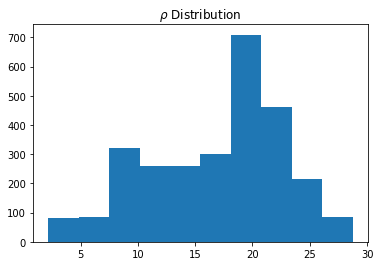

In [15]:
def describe_dmatrix(dmatrix, plot=True):
    distances = []
    for r, row in enumerate(dmatrix):
        for c, col in enumerate(row[r+1:]):
            distances.append(col)
    
    print(f"{min(distances)} <= $d$ <= {max(distances)}")
    if plot:
        plt.title(r"$\rho$ Distribution")
        plt.hist(distances)
        plt.show()

describe_dmatrix(datasets['19112']['dmatrix'])

## 4. Construct a Simplicial Complex

## 5. Computations

## 6. Persistence Diagrams

## 7. Find Persistent Homologies